<h1 style="text-align: center;">Healthy Heart = Healthy Life🫀</h1>

<img src="https://cvrti.utah.edu/wp-content/uploads/2024/03/11-10-23-edited-scaled.jpeg" alt="Employee Churn" width="600" height="600" style="display: block; margin: auto;">

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,recall_score ,accuracy_score,precision_score, roc_auc_score

# Read Data

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.duplicated().sum()

0

# EDA

Numeric Features Distribution

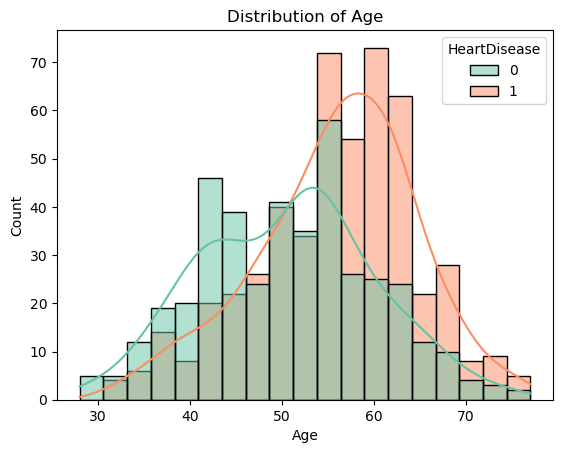

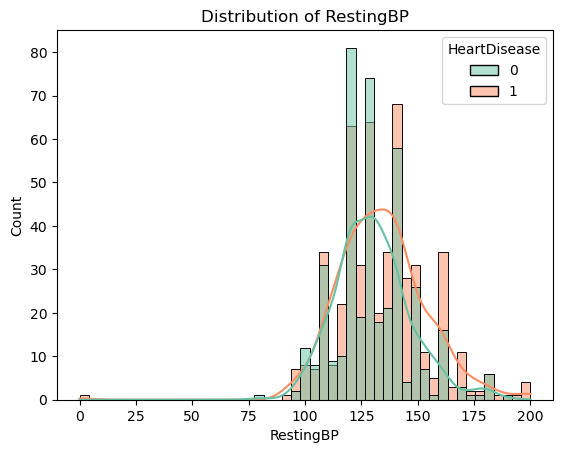

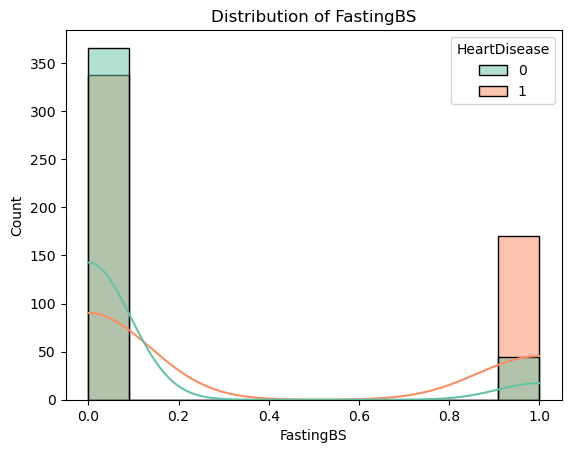

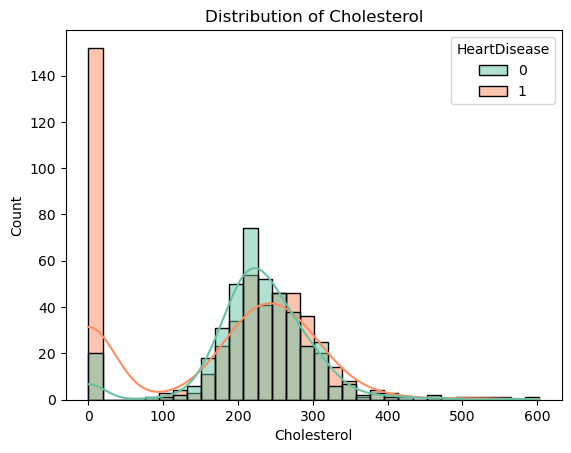

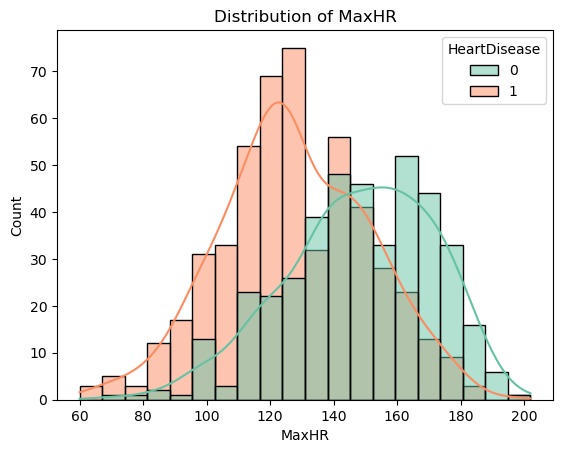

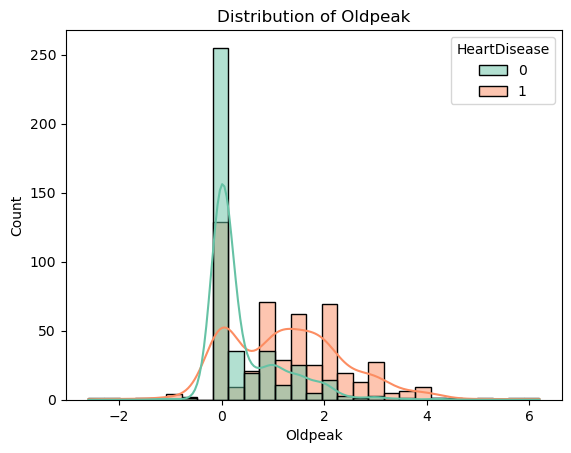

In [8]:
numerical_features = ['Age', 'RestingBP', 'FastingBS','Cholesterol', 'MaxHR', 'Oldpeak']
for feature in numerical_features:
    plt.figure()
    sns.histplot(data=df, x=feature, kde=True, hue="HeartDisease", palette="Set2")
    plt.title(f"Distribution of {feature}")
    plt.show()

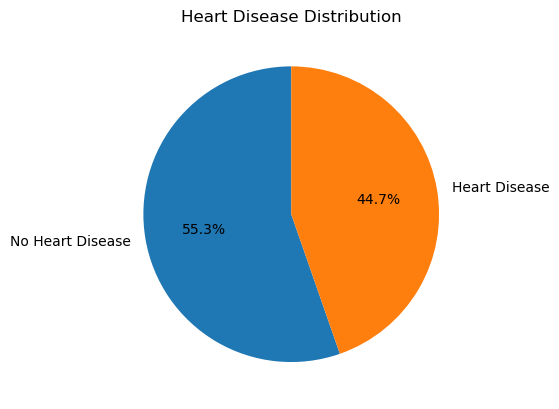

In [9]:
# Count the values for HeartDisease
heart_disease_counts = df['HeartDisease'].value_counts()
plt.figure()
plt.pie(
    heart_disease_counts, 
    labels=['No Heart Disease', 'Heart Disease'], 
    autopct='%1.1f%%', 
    startangle=90, 
)
plt.title('Heart Disease Distribution')
plt.show()

Pair plot for numeric feature

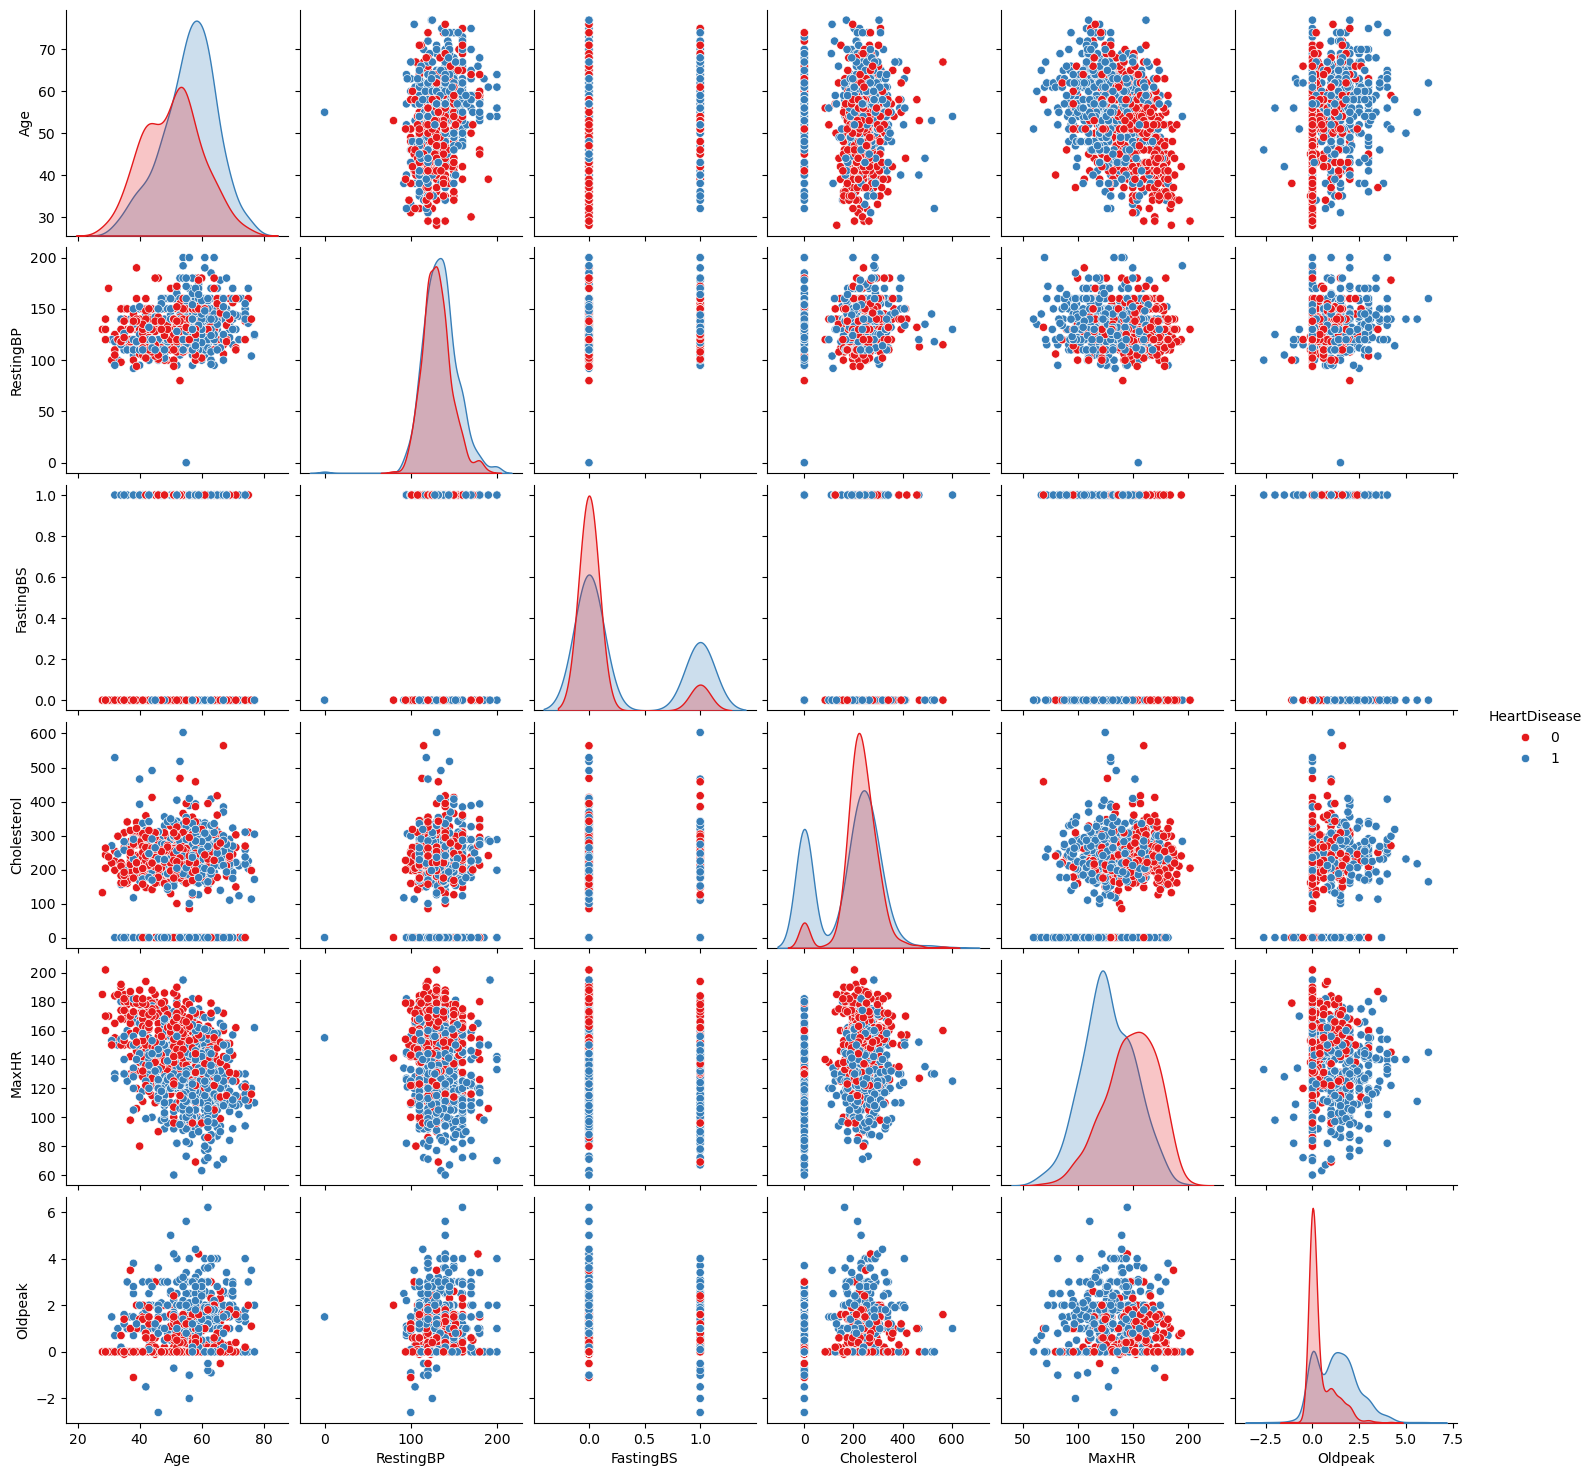

In [10]:
sns.pairplot(data=df, vars=numerical_features, hue="HeartDisease", palette="Set1")
plt.show()

 Heart Disease by Age Group

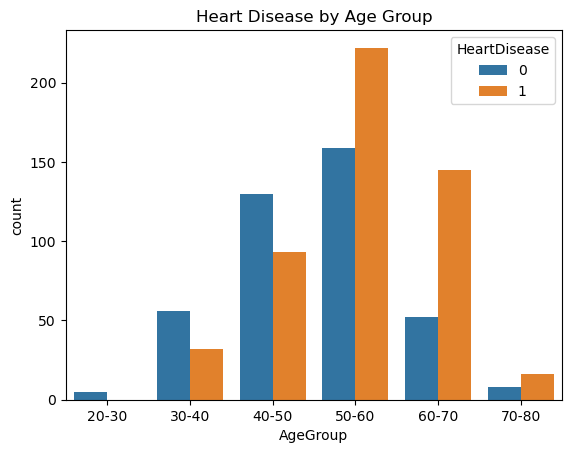

In [11]:
df["AgeGroup"] = pd.cut(df["Age"], bins=[20, 30, 40, 50, 60, 70, 80], labels=["20-30", "30-40", "40-50", "50-60", "60-70", "70-80"])
sns.countplot(data=df, x="AgeGroup", hue="HeartDisease")
plt.title("Heart Disease by Age Group")
plt.show()

Heart disease prevalence is higher in the age group of 50 to 70, while it is lower in the age group of 20 to 30.








 MaxHR Distribution by Heart Disease

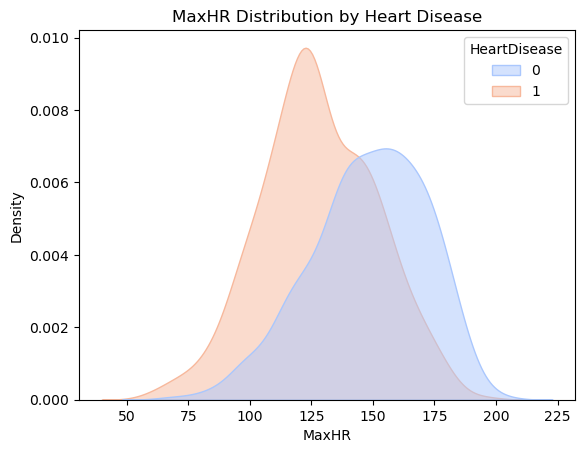

In [12]:
sns.kdeplot(data=df, x="MaxHR", hue="HeartDisease", fill=True, palette="coolwarm", alpha=0.5)
plt.title("MaxHR Distribution by Heart Disease")
plt.show()

 Chest Pain Type by Heart Disease Using Count Plot

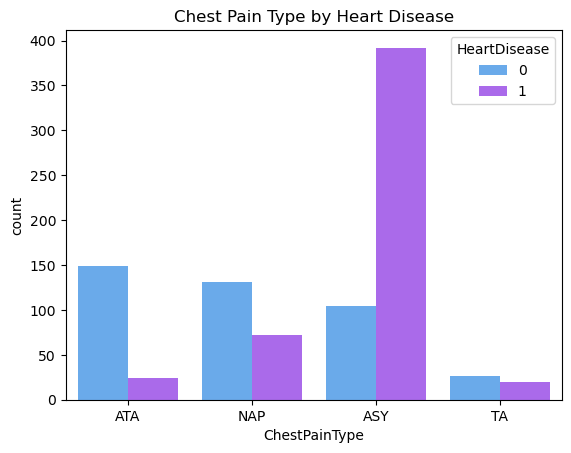

In [13]:
sns.countplot(data=df, x="ChestPainType", hue="HeartDisease", palette="cool")
plt.title("Chest Pain Type by Heart Disease")
plt.show()

Heart disease is more prevalent in individuals with ASY (Atypical) chest pain.








ST_Slope vs Oldpeak by Heart Disease using scatter plot

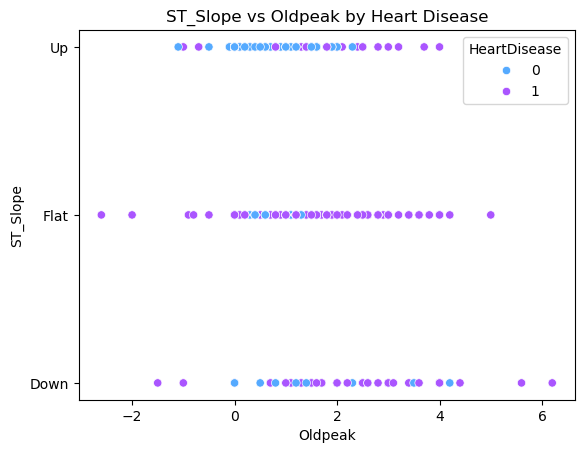

In [14]:
sns.scatterplot(data=df, x="Oldpeak", y="ST_Slope", hue="HeartDisease", palette="cool")
plt.title("ST_Slope vs Oldpeak by Heart Disease")
plt.show()

Count plot Fasting Blood Sugar by Heart Disease

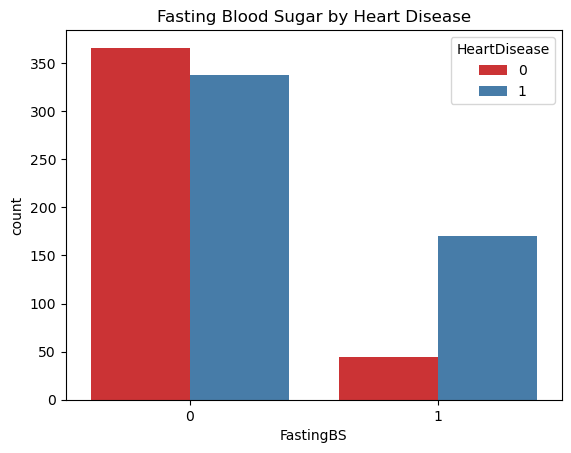

In [15]:
sns.countplot(data=df, x="FastingBS", hue="HeartDisease", palette="Set1")
plt.title("Fasting Blood Sugar by Heart Disease")
plt.show()

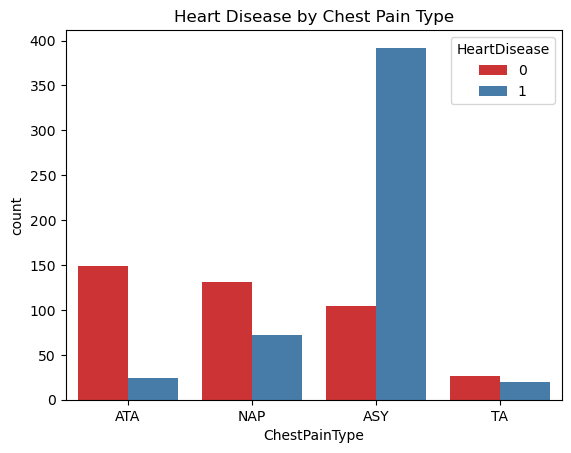

In [16]:
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease', palette='Set1')
plt.title('Heart Disease by Chest Pain Type')
plt.show()

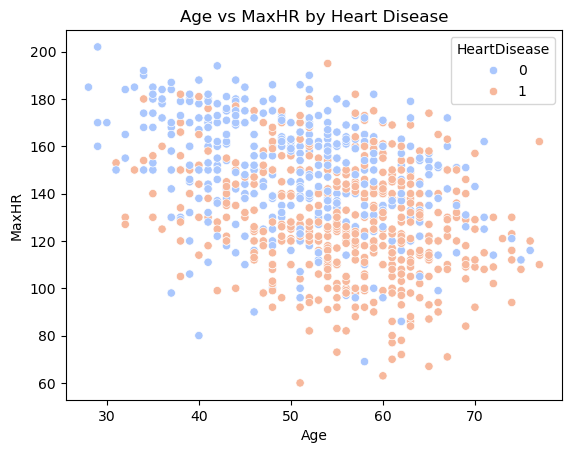

In [17]:
sns.scatterplot(data=df, x='Age', y='MaxHR', hue='HeartDisease', palette='coolwarm')
plt.title('Age vs MaxHR by Heart Disease')
plt.show()

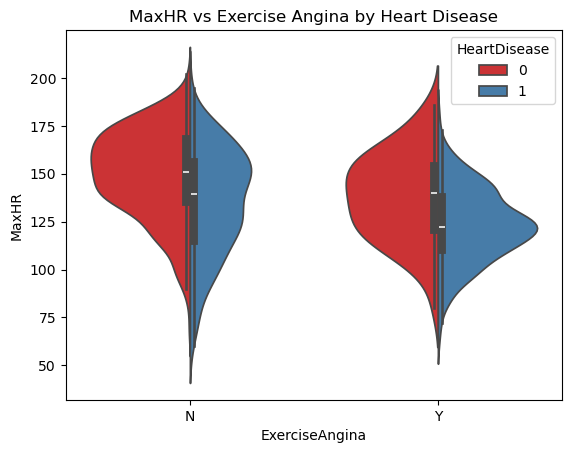

In [18]:
sns.violinplot(data=df, x='ExerciseAngina', y='MaxHR', hue='HeartDisease', split=True, palette='Set1')
plt.title('MaxHR vs Exercise Angina by Heart Disease')
plt.show()

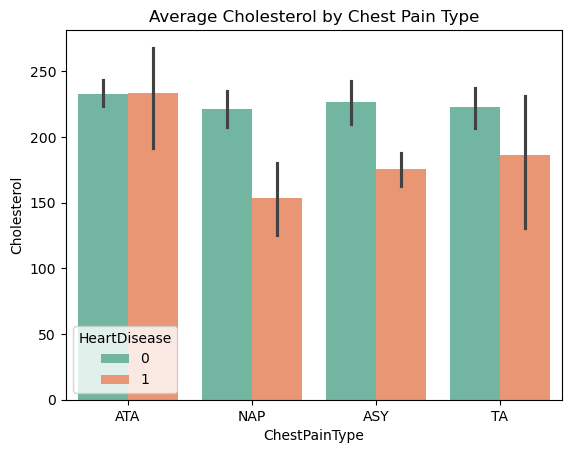

In [19]:
sns.barplot(data=df, x='ChestPainType', y='Cholesterol', hue='HeartDisease', palette='Set2')
plt.title('Average Cholesterol by Chest Pain Type')
plt.show()

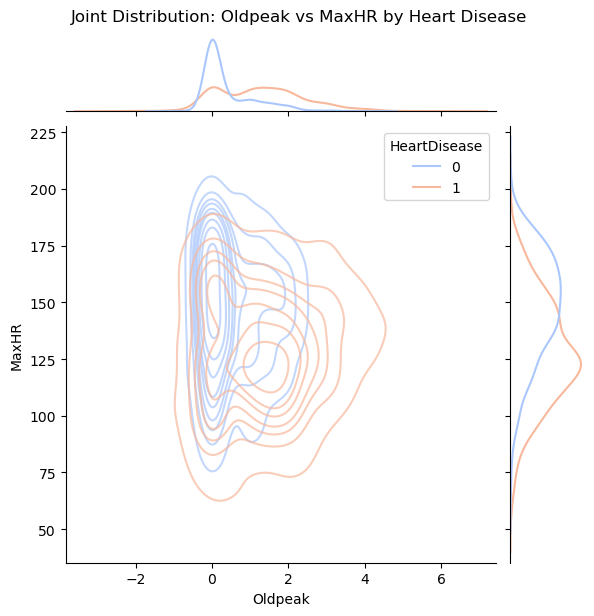

In [20]:
sns.jointplot(data=df, x='Oldpeak', y='MaxHR', hue='HeartDisease', kind='kde', palette='coolwarm', alpha=0.7)
plt.suptitle('Joint Distribution: Oldpeak vs MaxHR by Heart Disease', y=1.02)
plt.show()

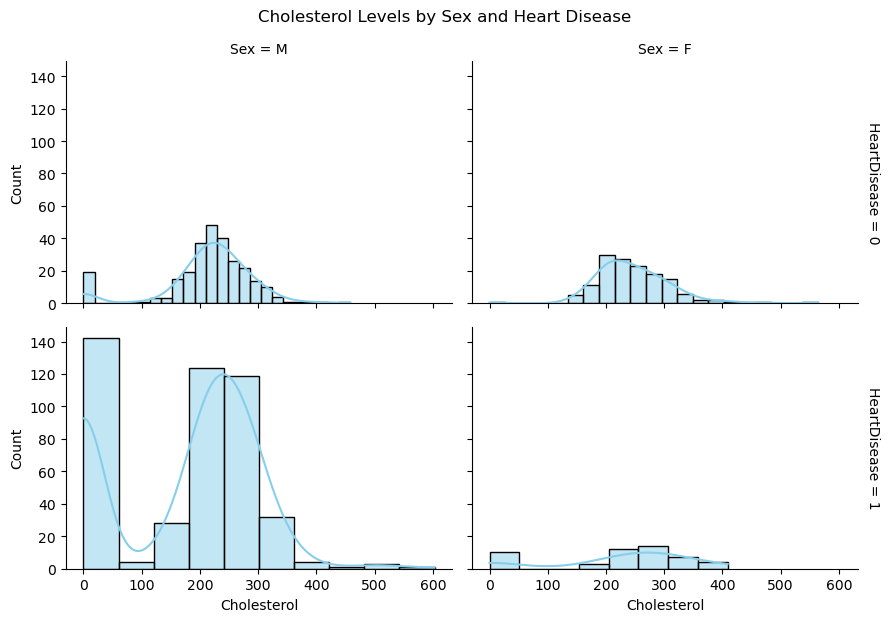

In [21]:
g = sns.FacetGrid(df, col='Sex', row='HeartDisease', margin_titles=True, height=3, aspect=1.5)
g.map(sns.histplot, 'Cholesterol', kde=True, color='skyblue')
g.fig.suptitle('Cholesterol Levels by Sex and Heart Disease', y=1.03)
plt.show()


# Encoding Categorical data

In [22]:
lbl=LabelEncoder()
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG','ExerciseAngina','ST_Slope']
for col in categorical_columns:
    df[col] = lbl.fit_transform(df[col])

Define the Correlationship between features

In [23]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroup
0,40,1,1,140,289,0,1,172,0,0.0,2,0,30-40
1,49,0,2,160,180,0,1,156,0,1.0,1,1,40-50
2,37,1,1,130,283,0,2,98,0,0.0,2,0,30-40
3,48,0,0,138,214,0,1,108,1,1.5,1,1,40-50
4,54,1,2,150,195,0,1,122,0,0.0,2,0,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1,40-50
914,68,1,0,144,193,1,1,141,0,3.4,1,1,60-70
915,57,1,0,130,131,0,1,115,1,1.2,1,1,50-60
916,57,0,1,130,236,0,0,174,0,0.0,1,1,50-60


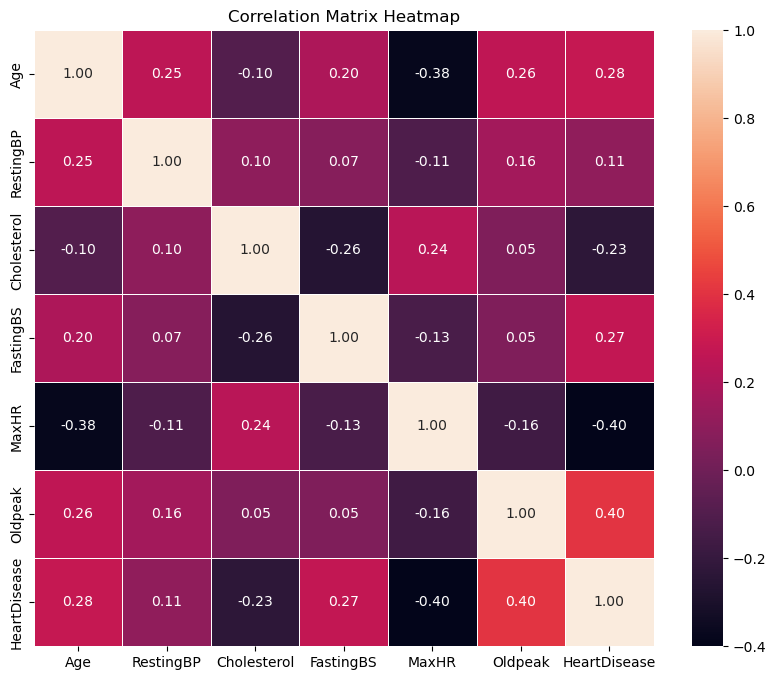

In [24]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [25]:
X = df.drop(['HeartDisease', 'AgeGroup'], axis=1)
y = df['HeartDisease']

# Scaling Our data

In [26]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()

X = sc.fit_transform(X)

# Splitting Data

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(734, 11)
(734,)
(184, 11)
(184,)


### Evaluation Function

In [29]:
def evaluate_model(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")

In [30]:
final_res =[]

# Modeling

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()

# Train the model
LR.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred_LR = LR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_LR)
final_res.append(accuracy)

In [33]:
evaluate_model(y_test,y_pred_LR)

Accuracy: 0.8478260869565217
Precision: 0.9072164948453608
Recall: 0.822429906542056
ROC AUC: 0.8527733948294696


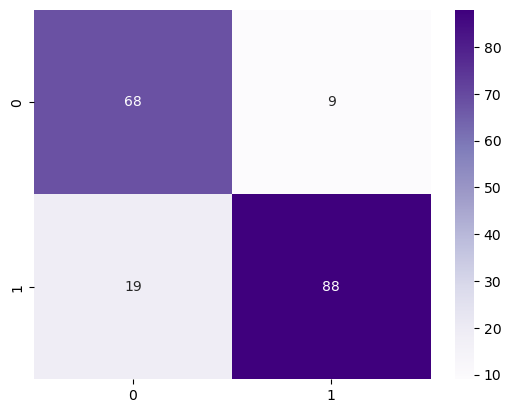

In [34]:
cm = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.show()

## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
y_pred_RF = RF.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_RF)
final_res.append(accuracy)

In [37]:
evaluate_model(y_test,y_pred_RF)

Accuracy: 0.8804347826086957
Precision: 0.897196261682243
Recall: 0.897196261682243
ROC AUC: 0.8771695594125501


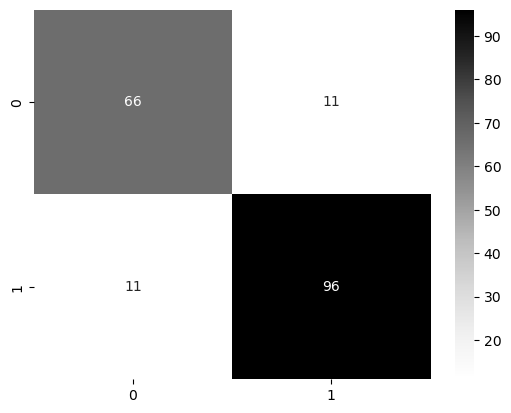

In [38]:
cm = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greys")
plt.show()

## SVM

In [39]:
from sklearn.svm import SVC
svm= SVC(random_state=42)

svm.fit(X_train, y_train)

SVC(random_state=42)

In [40]:
y_pred_svm = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
final_res.append(accuracy)

In [41]:
evaluate_model(y_test,y_pred_svm)

Accuracy: 0.8641304347826086
Precision: 0.8942307692307693
Recall: 0.8691588785046729
ROC AUC: 0.863150867823765


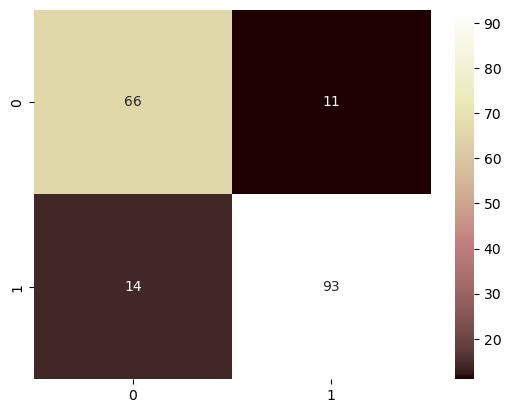

In [42]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap="pink")
plt.show()

In [43]:
final=np.array(final_res)
result=final.reshape(3,1)
columns=['Accuracy']
index=['Logistic Regression','Random Forest','SVM']
final_result=pd.DataFrame(result,index=index,columns=columns)
final_result

,Accuracy
Logistic Regression,0.847826
Random Forest,0.880435
SVM,0.864130
